# Pipeline and PCA with KNN, SVM and Decision Tree 

In [1]:

from sklearn import datasets
import pandas as pd
import sklearn 
import numpy as np

iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


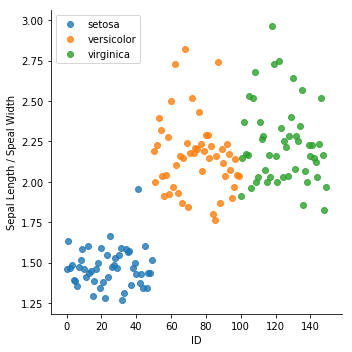

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.ylabel("Sepal Length / Speal Width")
plt.show()

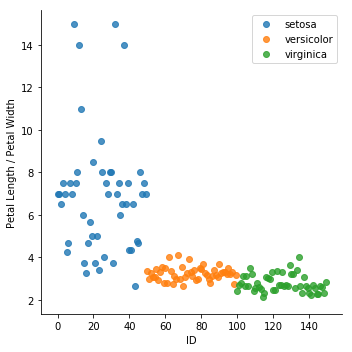

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["petal_length"]/iris["petal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.ylabel("Petal Length / Petal Width")
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/iris/iris.data', header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 5)

In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 0:3].values
y = df.loc[:, 4].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
print X

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
le.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([0, 1, 2])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

# Pipeline for KNN model with k-fold cross validation and hyperparameter tunning 

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        KNeighborsClassifier(n_neighbors=3))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

Test Accuracy: 0.967


In [55]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_knn.fit(X_train[train], y_train[train])
    score = pipe_knn.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [36 36 36], Acc: 0.917
Fold:  2, Class dist.: [36 36 36], Acc: 0.917
Fold:  3, Class dist.: [36 36 36], Acc: 1.000
Fold:  4, Class dist.: [36 36 36], Acc: 1.000
Fold:  5, Class dist.: [36 36 36], Acc: 1.000
Fold:  6, Class dist.: [36 36 36], Acc: 0.833
Fold:  7, Class dist.: [36 36 36], Acc: 0.917
Fold:  8, Class dist.: [36 36 36], Acc: 1.000
Fold:  9, Class dist.: [36 36 36], Acc: 1.000
Fold: 10, Class dist.: [36 36 36], Acc: 1.000

CV accuracy: 0.958 +/- 0.056


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91666667 0.91666667 1.         1.         1.         0.83333333
 0.91666667 1.         1.         1.        ]
CV accuracy: 0.958 +/- 0.056


# Pipeline for SVM model with k-fold cross validation and hyperparameter tunning 

In [57]:
from sklearn import svm

pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        svm.SVC(gamma='scale'))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.967


In [58]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svm.fit(X_train[train], y_train[train])
    score = pipe_svm.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [36 36 36], Acc: 0.917
Fold:  2, Class dist.: [36 36 36], Acc: 0.917
Fold:  3, Class dist.: [36 36 36], Acc: 1.000
Fold:  4, Class dist.: [36 36 36], Acc: 0.917
Fold:  5, Class dist.: [36 36 36], Acc: 1.000
Fold:  6, Class dist.: [36 36 36], Acc: 1.000
Fold:  7, Class dist.: [36 36 36], Acc: 1.000
Fold:  8, Class dist.: [36 36 36], Acc: 1.000
Fold:  9, Class dist.: [36 36 36], Acc: 1.000
Fold: 10, Class dist.: [36 36 36], Acc: 0.917

CV accuracy: 0.967 +/- 0.041


In [63]:
 
scores_svm = cross_val_score(estimator=pipe_svm,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores_svm)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svm), np.std(scores_svm)))

CV accuracy scores: [0.91666667 0.91666667 1.         0.91666667 1.         1.
 1.         1.         1.         0.91666667]
CV accuracy: 0.967 +/- 0.041


# Pipeline for Decision Tree model with k-fold cross validation and hyperparameter tunning 

In [60]:
from sklearn import tree

pipe_dt = make_pipeline(StandardScaler(), PCA(n_components=3), tree.DecisionTreeClassifier())

pipe_dt.fit(X_train, y_train)
y_pred = pipe_dt.predict(X_test)
print('Test Accuracy: %.3f' % pipe_dt.score(X_test, y_test))


Test Accuracy: 0.933


In [73]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_dt.fit(X_train[train], y_train[train])
    score = pipe_dt.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold:  1, Class dist.: [36 36 36], Acc: 0.917
Fold:  2, Class dist.: [36 36 36], Acc: 0.917
Fold:  3, Class dist.: [36 36 36], Acc: 1.000
Fold:  4, Class dist.: [36 36 36], Acc: 0.917
Fold:  5, Class dist.: [36 36 36], Acc: 1.000
Fold:  6, Class dist.: [36 36 36], Acc: 0.917
Fold:  7, Class dist.: [36 36 36], Acc: 0.917
Fold:  8, Class dist.: [36 36 36], Acc: 1.000
Fold:  9, Class dist.: [36 36 36], Acc: 1.000
Fold: 10, Class dist.: [36 36 36], Acc: 0.917

CV accuracy: 0.950 +/- 0.041


In [64]:
scores_dt = cross_val_score(estimator=pipe_dt,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores_dt)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_dt), np.std(scores_dt)))

CV accuracy scores: [0.91666667 0.91666667 1.         0.91666667 1.         0.91666667
 0.91666667 0.91666667 1.         0.91666667]
CV accuracy: 0.942 +/- 0.038
